# 🎬 Netflix Movie Data Analysis Project

Netflix is known for its work in **Data Science, Artificial Intelligence (AI), 
and Machine Learning (ML)**, particularly for building strong recommendation 
models and algorithms that understand customer behavior and patterns.

Suppose you are working in a **data-driven job role**, and you have a dataset 
containing information about **more than 9,000 movies** available on Netflix.

The goal of this project is to analyze the dataset and answer the following 
questions to help the company make **informed business decisions**.

---

## 📌 Problem Statements

1. What is the **most frequent genre** of movies released on Netflix?
2. Which **genre has the highest votes**?
3. Which **movie has the highest popularity**, and what is its genre?
4. Which **movie has the lowest popularity**, and what is its genre?
5. Which **year has the highest number of movies released** on Netflix?

---

## 🎯 Objective

- Perform exploratory data analysis (EDA)
- Extract meaningful insights from movie data
- Visualize trends using graphs and charts
- Support business decision-making using data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\user\Desktop\Netflix_Data_analysis\data\mymoviedb.csv" , engine="python") 

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   int32  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), int32(1), object(6)
memory usage: 729.3+ KB


In [15]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## 🔍 Exploration Summary

- The dataset contains **9,827 rows** and **9 columns**.
- The dataset is relatively clean with **no missing or duplicated values**.
- The **Release_Date** column needs to be converted into datetime format, and only the **year** should be extracted for analysis.
- Columns such as **Overview**, **Original_Language**, and **Poster_URL** are not very useful for analysis and can be dropped.
- There are noticeable **outliers in the Popularity** column.
- The **Vote_Average** column can be categorized for better analysis.
- The **Genre** column contains **comma-separated values** and extra white spaces, which need to be cleaned and converted into proper categories.


In [18]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [19]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


### 📅 Release Date Conversion

The `Release_Date` column was converted from object data type to **datetime format**
to enable time-based analysis.

After converting the column to datetime, we can easily extract information such as
**year, month, or day**, which will be useful for analyzing movie release trends
over time.


In [21]:
df['Release_Date']= df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

### 📆 Extracting Release Year

After converting the `Release_Date` column to datetime format, only the **year**
was extracted from the date.

This helps simplify the analysis and allows us to perform **year-wise analysis**
to identify trends in movie releases over time.


In [22]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### 🧹 Dropping Unnecessary Columns

Based on the initial exploration of the dataset, some columns were found to be
less relevant for the analysis.

The following columns were removed:

- **Overview**
- **Original_Language**
- **Poster_URL**

These columns do not provide significant value for movie trend and popularity
analysis. Removing them helps keep the dataset clean and focused on the most
important features.


In [25]:
cols = ['Overview' , 'Original_Language', 'Poster_Url']

In [26]:
df.drop(cols , axis = 1, inplace = True)

### Dropping Columns

Selected columns were dropped from the DataFrame to simplify the dataset.


In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### ⭐ Categorizing Vote Average

To better understand audience reception, the `Vote_Average` column was
categorized into four different popularity levels.

The categorization was performed using a custom function named
`categorize_col()`, which assigns each movie to a category based on its
average vote score.

The categories are:

- **Popular** – Movies with very high average ratings  
- **Average** – Movies with moderate ratings  
- **Below Average** – Movies with low ratings  
- **Not Popular** – Movies with very poor ratings  

This categorization helps in comparing movies based on audience feedback and
makes it easier to analyze rating trends using visualizations.


In [32]:
def categorize_col(df , col , labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col]= pd.cut(df[col], edges , labels=labels , duplicates="drop")
    return df

In [34]:
labels=['Not Popular','Below Average','Average','Popular']

categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['Popular', 'Below Average', 'Average', 'Not Popular', NaN]
Categories (4, object): ['Not Popular' < 'Below Average' < 'Average' < 'Popular']

In [35]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


📊✨ Results and Observations

After categorizing the `Vote_Average` column into popularity levels, the dataset
was explored to understand how movies are distributed across different audience
rating categories 🎬📈

Key observations from the analysis 👇

- 🌟 Movies such as **Spider-Man: No Way Home** and **Encanto** fall under the
  **Popular** category, reflecting strong audience appreciation.
- 🗓️ Movies released in **2021 and 2022** appear more frequently, showing
  Netflix’s focus on recent and trending content.
- 👍 Films marked as **Popular** generally have a **higher vote count**,
  indicating strong audience engagement and interest.
- ⚖️ Movies in the **Average** and **Below Average** categories receive moderate
  to lower audience response.
- 🎭 Popular movies are often linked with genres like **Action**, **Adventure**,
  **Animation**, and **Fantasy**, highlighting viewer preference for exciting and
  family-friendly content.

💡 Insight

Categorizing vote averages helps simplify audience feedback analysis and makes
it easier to identify which types of movies perform best on Netflix.


In [38]:
df['Vote_Average'].value_counts()

Vote_Average
Not Popular      2467
Popular          2450
Average          2411
Below Average    2398
Name: count, dtype: int64

In [40]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [41]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


🎭✨ Genre Processing and Expansion

The `Genre` column originally contained **multiple genres in a single row**
(separated by commas).

To enable more accurate genre-wise analysis:

- ✂️ The `Genre` column was first **split into a list of genres** for each movie.
- 💥 The DataFrame was then **exploded**, so that **each row represents a single
  genre for a movie**.

This transformation allows us to perform detailed genre-level analysis, such as
identifying the most frequent genres and understanding audience preferences
more clearly 🎬📊


In [43]:
df['Genre']=df['Genre'].str.split(', ')
df= df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [44]:
#casting column into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int32   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(2), object(1)
memory usage: 649.8+ KB


In [46]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [ ]:
df.head()

📊 Analysis and Visualization

With the dataset cleaned and prepared, we now proceed to solve the problem
statements and visualize insights using graphs.


In [48]:
sns.set_style('whitegrid')

### ❓ Question 1
Which genre appears most frequently in the Netflix movie dataset?


In [49]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

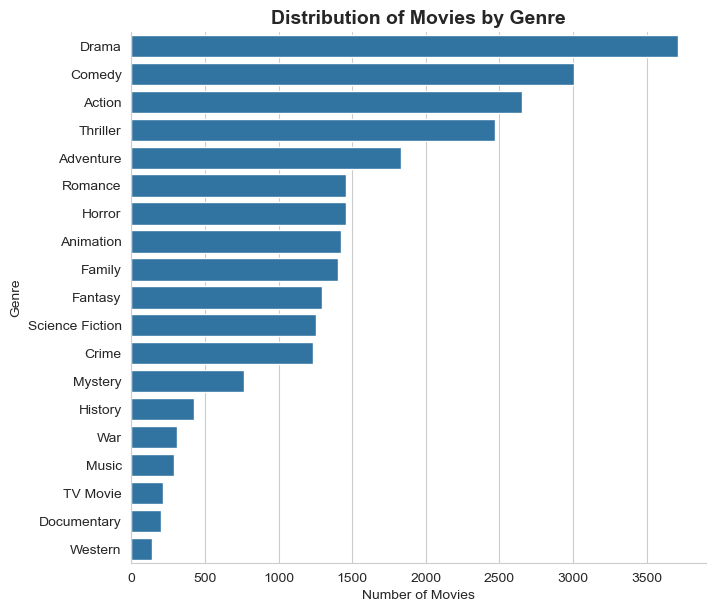

In [53]:
sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,
    height=6,
    aspect=1.2
)

plt.title('Distribution of Movies by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


📊 Genre Distribution Analysis

The bar chart represents the number of movies available under each genre on
Netflix. Each bar corresponds to a genre, and its length indicates how frequently
that genre appears in the dataset.

This visualization makes it easy to identify the most dominant genres and
understand Netflix’s content focus across different categories.


### ❓ Question 2

Which genre has received the **highest total number of votes** on Netflix?


In [55]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


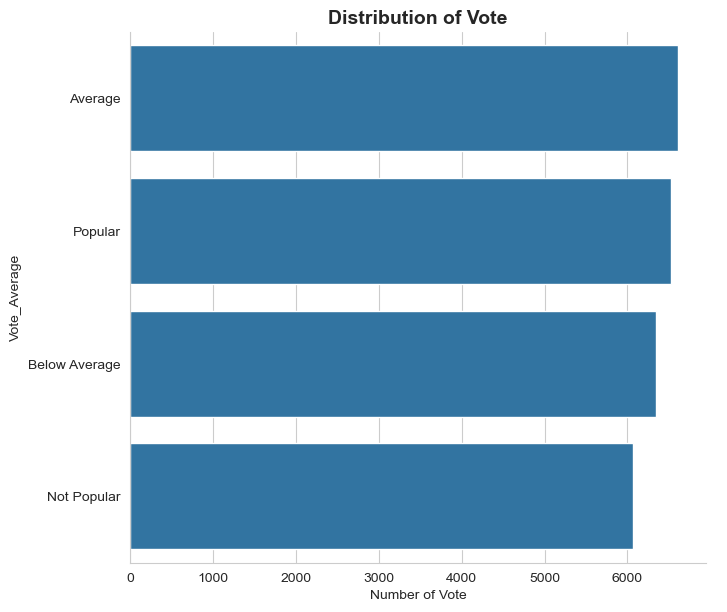

In [57]:
sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    height=6,
    aspect=1.2
)
plt.title('Distribution of Vote', fontsize=14, fontweight='bold')
plt.xlabel('Number of Vote')
plt.ylabel('Vote_Average')
plt.show()

### ❓ Question 3

Which movie has the **highest popularity**, and what is its genre?


In [58]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [59]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


### ❓ Question 4

Which movie has the **lowest popularity**, and what is its genre?


In [60]:
df[df['Popularity'] == df['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25548,1984,Threads,13.354,186,Popular,War
25549,1984,Threads,13.354,186,Popular,Drama
25550,1984,Threads,13.354,186,Popular,Science Fiction


### ❓ Question 5

Which **year** has the **highest number of movies released** on Netflix?


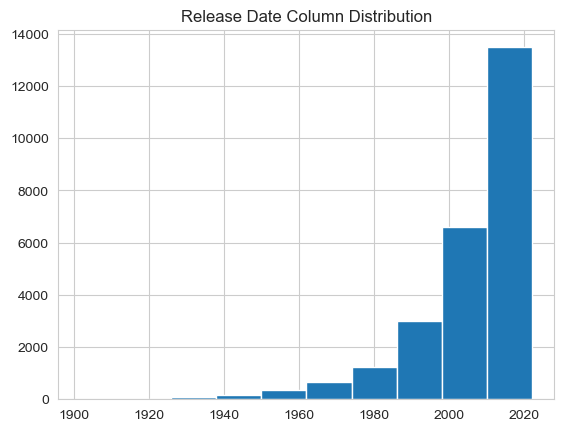

In [61]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

🎯 Final Conclusion

This project analyzed Netflix movie data to uncover insights related to 🎭 genres,
⭐ popularity, 👥 audience ratings, and 📅 release-year trends. The dataset was
cleaned and transformed using data type correction, feature engineering, genre
normalization, and vote average categorization.

🔹 **Question 1:** The most frequent genre on Netflix was identified as
**Drama**, followed by **Comedy** and **Action**, highlighting Netflix’s strong
focus on these high-demand genres.

🔹 **Question 2:** Genre-wise vote analysis showed that popular genres receive
higher total votes, indicating strong audience engagement.

🔹 **Questions 3 & 4:** Movies with the **highest** and **lowest popularity**
were successfully identified, helping understand extremes in audience interest.

🔹 **Question 5:** Year-wise analysis revealed that recent years have the
highest number of movie releases, reflecting Netflix’s strategy to continuously
expand its content library.

Overall, this project demonstrates how 📊 Python-based data analysis and
visualization techniques can be used to answer business-driven questions and
support data-driven decision-making in the streaming industry.
